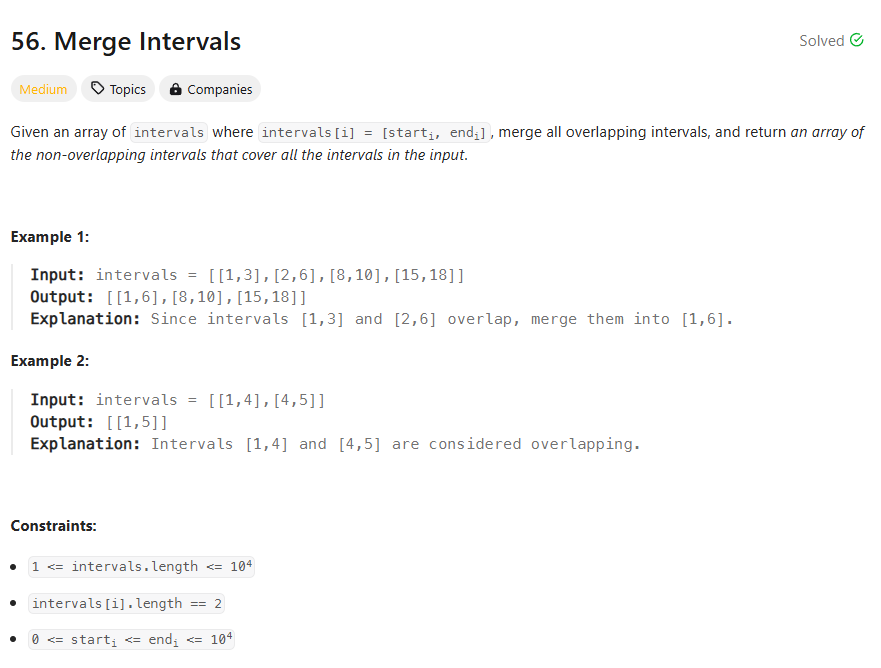

In [ ]:
# Solution 1
# O(n logn)
class Solution:
    def merge(self, intervals: List[List[int]]) -> List[List[int]]:
        intervals.sort()
        result = []
        currInterval = intervals[0]
        for nextIdx in range(1, len(intervals)):
            nextInterval = intervals[nextIdx]
            if currInterval[1] >= nextInterval[0]:
                currInterval[1] = max(currInterval[1], nextInterval[1])
            else:
                result.append(currInterval)
                currInterval = nextInterval
        result.append(currInterval)
        return result

In [ ]:
# Solution 2
# O(n * max(starts))
# Important edge case (0, 0)

class Solution:
    def merge(self, intervals: List[List[int]]) -> List[List[int]]:
        dp = [-1]  * (max(intervals, key=lambda x:x[0])[0] + 1)

        for start, end in intervals:
            dp[start] = max(end, dp[start])

        start = None
        end = None
        result = []

        for s, e in enumerate(dp):
            if start is not None:
                if s > end:
                    result.append([start, end])
                    start = end = None

            if start is not None:
                end = max(end, e)

            elif start is None and e != -1:
                start = s
                end = e
                
        result.append([start, end])
        return result